In [1]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo

In [25]:
bcw = fetch_ucirepo(id=17)
X = bcw.data.features 
y = bcw.data.targets 

In [26]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

model = DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=5,max_depth=2,criterion='gini').fit(X_train,y_train)

In [32]:
gini_tree1 = export_text(model, feature_names = list(X.columns))
print(gini_tree1)

|--- perimeter3 <= 115.35
|   |--- concave_points3 <= 0.16
|   |   |--- class: B
|   |--- concave_points3 >  0.16
|   |   |--- class: M
|--- perimeter3 >  115.35
|   |--- perimeter3 <= 117.45
|   |   |--- class: M
|   |--- perimeter3 >  117.45
|   |   |--- class: M



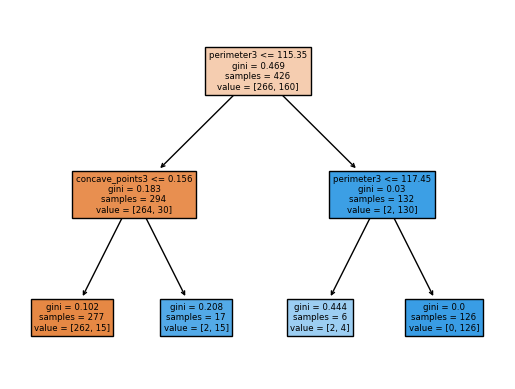

In [31]:
gini_tree = plot_tree(model, feature_names=X.columns, filled = True)

In [33]:
p1=294/426
p2=132/426

In [40]:
p1,p2

(0.6901408450704225, 0.30985915492957744)

In [41]:
entropy=-(p1*np.log2(p1) + p2*np.log2(p2))
entropy

0.8930108100446013

In [42]:
gini=1 - (p1)**2 - (p2)**2
gini

0.4276929180718112

In [43]:
misclassification_error=1 - max(p1,p2)
misclassification_error

0.3098591549295775